In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten                                      
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.keras.models import load_model

In [5]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [6]:
train_df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [7]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df.shape

(42000, 785)

## Dividing the values into x and y

In [9]:
x=train_df.drop('label',axis=1)
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x.shape

(42000, 784)

In [11]:
y=train_df['label']
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

## Reshaping and converting into images

In [12]:
x=x.values.reshape(-1,28,28,1)

In [13]:
x.shape

(42000, 28, 28, 1)

## Ploting the images

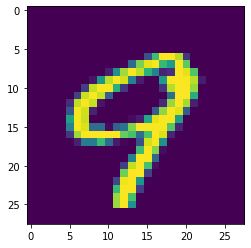

In [14]:
plt.imshow(x[100][:,:,0])

In [15]:
y[100]

9

## Diving the dataframe into train and test data set

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37800, 28, 28, 1)
(37800,)
(4200, 28, 28, 1)
(4200,)


## Normalization

In [18]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Building The CNN Layers

In [19]:
model=Sequential()

In [20]:
model.add(Convolution2D(32,(5,5),input_shape=(28,28,1),padding='same',activation='relu'))
model.add(Convolution2D(64,(5,5),input_shape=(28,28,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Dropout(0.2))
model.add(Convolution2D(128,(3,3),activation='relu',padding='same'))
model.add(Convolution2D(192,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 192)       221376    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 192)         0

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
filepath = os.path.join("./model_v{epoch}.h5")

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_accuracy',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')
callbacks = [checkpoint]

In [24]:
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test),callbacks=callbacks)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37600/37800 [============================>.] - ETA: 0s - loss: 0.1360 - accuracy: 0.9571
Epoch 00001: val_accuracy improved from -inf to 0.98548, saving model to ./model_v1.h5
37800/37800 [==============================] - 11s 300us/sample - loss: 0.1357 - accuracy: 0.9572 - val_loss: 0.0539 - val_accuracy: 0.9855
Epoch 2/30
37664/37800 [============================>.] - ETA: 0s - loss: 0.0502 - accuracy: 0.9847
Epoch 00002: val_accuracy did not improve from 0.98548
37800/37800 [==============================] - 7s 189us/sample - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0484 - val_accuracy: 0.9845
Epoch 3/30
37568/37800 [============================>.] - ETA: 0s - loss: 0.0363 - accuracy: 0.9889
Epoch 00003: val_accuracy improved from 0.98548 to 0.99024, saving model to ./model_v3.h5
37800/37800 [==============================] - 7s 190us/sample - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0279 - val_accuracy: 0.9902
E

37536/37800 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9977
Epoch 00028: val_accuracy did not improve from 0.99381
37800/37800 [==============================] - 7s 189us/sample - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.0619 - val_accuracy: 0.9905
Epoch 29/30
37696/37800 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9976
Epoch 00029: val_accuracy did not improve from 0.99381
37800/37800 [==============================] - 8s 204us/sample - loss: 0.0097 - accuracy: 0.9976 - val_loss: 0.0462 - val_accuracy: 0.9938
Epoch 30/30
37728/37800 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9981
Epoch 00030: val_accuracy did not improve from 0.99381
37800/37800 [==============================] - 7s 189us/sample - loss: 0.0085 - accuracy: 0.9981 - val_loss: 0.0481 - val_accuracy: 0.9917


## Testing The model

In [25]:
model.evaluate(x_test,y_test)

4200/4200 [==============================] - 0s 99us/sample - loss: 0.0481 - accuracy: 0.9917


[0.048061527432512595, 0.9916667]

### Model is 99.38% Accurate.

### Saving A JS Model

In [26]:
!pip install tensorflowjs

     |████████████████████████████████| 57 kB 1.5 MB/s eta 0:00:011
     |████████████████████████████████| 144.4 MB 59 kB/s s eta 0:00:01     |███████████████████████▋        | 106.8 MB 64.0 MB/s eta 0:00:01
     |████████████████████████████████| 454 kB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 51.9 MB/s eta 0:00:01
     |████████████████████████████████| 248 kB 45.1 MB/s eta 0:00:01
     |████████████████████████████████| 777 kB 49.6 MB/s eta 0:00:01
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-py3-none-any.whl size=32849 sha256=edd91b656e7f645994a15b243690b8024d6627b1f2f5e0c87d17b6ac83cc4705
  Stored in directory: /root/.cache/pip/wheels/79/8e/a2/5043c19fe89c93e2ae1adb66d066ff743057e70dd0ccbed62c
Successfully built PyInquirer
ERROR: tensorflow 2.1.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.2.1 which is incompa

    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 3.0.4
    Uninstalling prompt-toolkit-3.0.4:
      Successfully uninstalled prompt-toolkit-3.0.4


In [ ]:
!tensorflowjs_converter --input_format keras './model_v25.h5' './js-model'